# Sweep graphs
Revive the babies

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

# set font sizes
import matplotlib 
SMALL_SIZE = 14
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [36]:
def get_data(sweep_name, x_label, y_label, z_label = "val_loss"):
    'Extracts relevant data from the sweep'
    
    pso_df = pd.read_csv("sweep_data/"+sweep_name+".csv")

    x = pso_df[[x_label]]
    y = pso_df[[y_label]]
    z = pso_df[[z_label]]
    
    return x, y, z

In [220]:
def plot_heatmap(z, x_range, y_range, clip_min = 0, clip_max = 1, square = True, grid_space = 6, cmap_lims = (0, 1)):
    'Plots a heatmap with the data'
    
    temp = np.array(z, dtype = 'float')
    temp = np.nan_to_num(temp, nan=0.0, posinf=0.0, neginf=0.0)
    temp = np.clip(temp, clip_min, clip_max)
    z_array = np.fliplr(temp.reshape((x_range[2], y_range[2])))
    
    cmap = plt.get_cmap('YlGnBu')
#     cmap.set_under(color = 'r', alpha = 0.1)
    heat_map = sb.heatmap(z_array.T, xticklabels=True, yticklabels=True, square = square, 
                          cmap=cmap, vmin=cmap_lims[0], vmax=cmap_lims[1])  # set the colour limits here
    plt.xticks(ticks = np.linspace(0, x_range[2]-1, grid_space)+0.5, rotation=0)
    heat_map.set_xticklabels(np.round(np.linspace(x_range[0], x_range[1], grid_space), 1))
    plt.yticks(ticks = np.linspace(0, y_range[2]-1, grid_space)+0.5, rotation=0)
    heat_map.set_yticklabels(np.flip(np.round(np.linspace(y_range[0], y_range[1], grid_space), 1)))
    plt.xlabel(x_range[3])
    plt.ylabel(y_range[3])
#     plt.xlim(1) # set the x limits here
    plt.show()
    
    return z_array

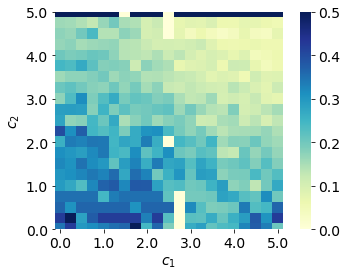

In [207]:
x, y, z = get_data('pso_16', "c_1", "c_2")

plot_heatmap(z, x_range = (0, 5, 21, "$c_1$"), y_range = (0, 5, 21, "$c_2$"), cmap_lims = (0, 0.5))

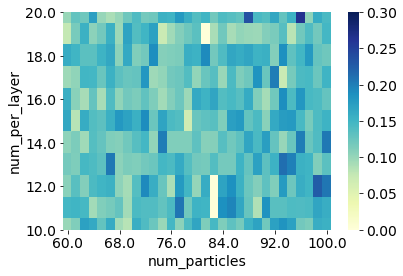

In [210]:
x, y, z = get_data('pso_17', "num_particles", "num_per_layer")
# print(x, y, z)

plot_heatmap(z, x_range = (60, 100, 31, "num_particles"), y_range = (10, 20, 11, "num_per_layer"), square = False, cmap_lims = (0, 0.3))

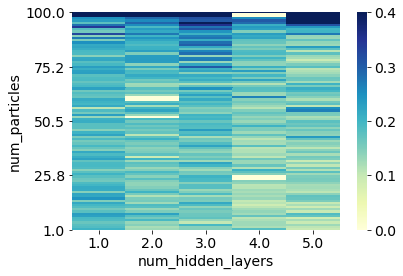

In [212]:
x, y, z = get_data('pso_18', "num_hidden_layers", "num_particles")

plot_heatmap(z, x_range = (1,5,5, "num_hidden_layers"), y_range = (1,100,100, "num_particles"), square = False, grid_space = 5, cmap_lims = (0, 0.4))

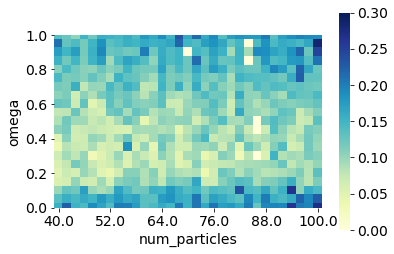

In [221]:
x, y, z = get_data('pso_19',"num_particles", "omega")

z_array = plot_heatmap(z, x_range = (40,100,31, "num_particles"), y_range = (0,1,21, "omega"), cmap_lims = (0, 0.3))

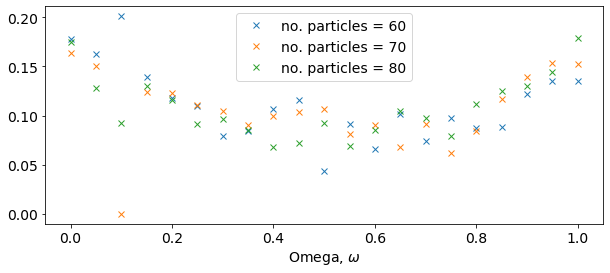

In [249]:
omega_range = np.linspace(0, 1, 21)

plt.figure(figsize = [10, 4])
plt.plot(omega_range, z_array[10, :], 'x', label = "no. particles = "+str(np.unique(np.array(x))[10]))
plt.plot(omega_range, z_array[15, :], 'x', label = "no. particles = "+str(np.unique(np.array(x))[15]))
plt.plot(omega_range, z_array[20, :], 'x', label = "no. particles = "+str(np.unique(np.array(x))[20]))
plt.xlabel("Omega, $\omega$")
plt.legend()

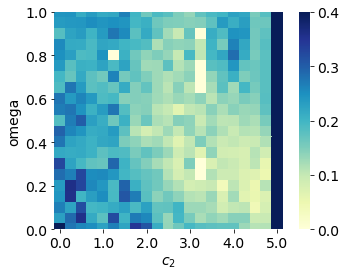

In [259]:
x, y, z = get_data('pso_20',"c_2", "omega")
# print(x, y, z)

z_array = plot_heatmap(z, x_range = (0, 5, 21, "$c_2$"), y_range = (0,1,21, "omega"), cmap_lims = (0, 0.4))

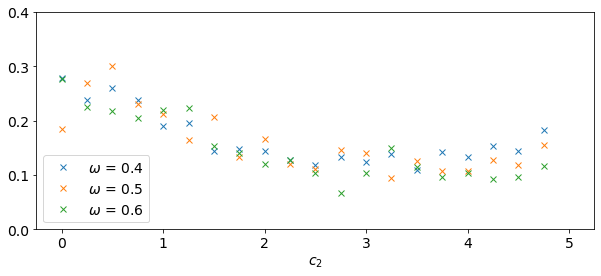

In [256]:
c2_range = np.linspace(0, 5, 21)

plt.figure(figsize = [10, 4])
plt.plot(c2_range, z_array[:, 8], 'x', label = "$\omega$ = "+str(np.unique(np.array(y))[8]))
plt.plot(c2_range, z_array[:, 10], 'x', label = "$\omega$ = "+str(np.unique(np.array(y))[10]))
plt.plot(c2_range, z_array[:, 12], 'x', label = "$\omega$ = "+str(np.unique(np.array(y))[12]))
plt.xlabel("$c_2$")
plt.ylim(0, 0.4)
plt.legend()

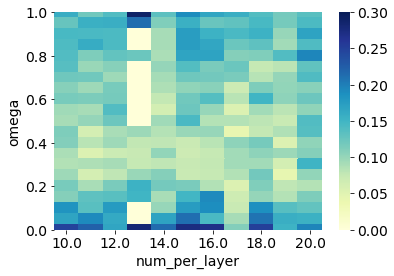

array([[0.15917516, 0.12734551, 0.14630423, 0.14257362, 0.14035727,
        0.13652579, 0.12286972, 0.1084152 , 0.11643244, 0.09597123,
        0.0924507 , 0.11361268, 0.11108181, 0.08945959, 0.08644075,
        0.09679051, 0.11603767, 0.10957212, 0.18409303, 0.16768236,
        0.24853851],
       [0.12182871, 0.1559765 , 0.14495697, 0.1601435 , 0.11314328,
        0.09874319, 0.12130426, 0.09698216, 0.11477854, 0.09222409,
        0.10183744, 0.06293014, 0.08214638, 0.05498616, 0.08825272,
        0.06289268, 0.09086467, 0.13156778, 0.13529288, 0.19319598,
        0.22269616],
       [0.14009922, 0.15747018, 0.14391607, 0.14352478, 0.12890816,
        0.108028  , 0.09684804, 0.11633628, 0.11761821, 0.13963076,
        0.12403056, 0.09129274, 0.09622562, 0.07039268, 0.09226705,
        0.07919552, 0.11508389, 0.13593252, 0.17737155, 0.16345453,
        0.16662967],
       [0.2896591 , 0.21338109, 0.        , 0.        , 0.12536046,
        0.        , 0.        , 0.        , 0.       

In [261]:
x, y, z = get_data('pso_21',"num_per_layer", "omega")
# print(x, y, z)

plot_heatmap(z, x_range = (10, 20, 11, "num_per_layer"), y_range = (0,1,21, "omega"), square = False, cmap_lims = (0, 0.3))